In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# from algo123 import *
# from alg_cathy import *

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [42]:
solar = pd.read_csv("../../data/solar.csv")

In [43]:
solar = solar.loc[solar['Year'].isin(['2018','2019', '2020', '2021'])].drop(columns={'Product code', 'Bureau of Meteorology station number'})
solar = solar.rename(columns={'Year': 'year', 'Month': 'month', 'Day': 'day', 'Daily global solar exposure (MJ/m*m)': 'solar_exposure'})
solar

,year,month,day,solar_exposure
10227,2018,1,1,31.40
10228,2018,1,2,29.70
10229,2018,1,3,27.20
10230,2018,1,4,31.80
10231,2018,1,5,31.70
...,...,...,...,...
11595,2021,9,30,8.40
11596,2021,10,1,18.10
11597,2021,10,2,18.00
11598,2021,10,3,16.10


In [44]:
solar.isnull().values.any()

False

In [33]:
vic_data = pd.read_excel("../../data/market_data.xlsx")

In [155]:
vic = vic_data.loc[1:].reset_index(drop=True)
vic = vic.rename(columns={"Time (UTC+10)": "time"})
vic['month'] = vic.time.dt.month
vic['day'] = vic.time.dt.day
vic['year'] = vic.time.dt.year
vic['weekday'] = vic['time'].apply(lambda x: x.weekday())

period = pd.DataFrame({"period_time":pd.date_range('2018-01-01', periods=48, freq="30T").time})
period.index +=1
period["period"] = period.index

vic["period_time"] = vic["time"].dt.time
vic = pd.merge(vic, period, how="left", on ="period_time").drop(["period_time"], axis =1)
vic = pd.merge(vic, solar, how = 'left', on = ['year', 'month', 'day'])
vic.head()

,time,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW),month,day,year,weekday,period,solar_exposure
0,2018-01-01 00:30:00,91.86,107.17,92.28,92.46,0.15,43.07,118.73,131.68,6974,1359,1082,4398,1,1,2018,0,2,31.40
1,2018-01-01 01:00:00,88.83,103.31,87.53,87.62,0.13,41.67,110.48,119.98,6790,1316,1071,4238,1,1,2018,0,3,31.40
2,2018-01-01 01:30:00,73.62,88.20,76.29,73.08,0.14,42.15,120.09,123.86,6536,1240,1067,4112,1,1,2018,0,4,31.40
3,2018-01-01 02:00:00,71.49,85.24,75.10,70.18,0.16,38.31,114.64,132.72,6339,1194,1061,3956,1,1,2018,0,5,31.40
4,2018-01-01 02:30:00,69.27,81.75,72.92,67.43,0.16,33.39,112.90,120.73,6195,1163,1060,3833,1,1,2018,0,6,31.40


In [156]:
vic.loc[vic['month'].isin([12,1,2]), 'season'] = 1
vic.loc[vic['month'].isin([3,4,5]), 'season'] = 2
vic.loc[vic['month'].isin([6,7,8]), 'season'] = 3
vic.loc[vic['month'].isin([9, 10, 11]), 'season'] = 4


In [48]:
vic.head(5)

,time,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW),month,day,year,weekday,period,solar_exposure,season
0,2018-01-01 00:30:00,91.86,107.17,92.28,92.46,0.15,43.07,118.73,131.68,6974,1359,1082,4398,1,1,2018,0,2,31.40,1.00
1,2018-01-01 01:00:00,88.83,103.31,87.53,87.62,0.13,41.67,110.48,119.98,6790,1316,1071,4238,1,1,2018,0,3,31.40,1.00
2,2018-01-01 01:30:00,73.62,88.20,76.29,73.08,0.14,42.15,120.09,123.86,6536,1240,1067,4112,1,1,2018,0,4,31.40,1.00
3,2018-01-01 02:00:00,71.49,85.24,75.10,70.18,0.16,38.31,114.64,132.72,6339,1194,1061,3956,1,1,2018,0,5,31.40,1.00
4,2018-01-01 02:30:00,69.27,81.75,72.92,67.43,0.16,33.39,112.90,120.73,6195,1163,1060,3833,1,1,2018,0,6,31.40,1.00


In [157]:
vic_train = vic[vic["time"] <= "2020-12-31 23:30:00"]
vic_test = vic[(vic['time'] >= "2021-07-01 00:00:00") & (vic['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
vic_cv = vic[(vic['time'] >= "2021-01-01 00:00:00") & (vic['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)


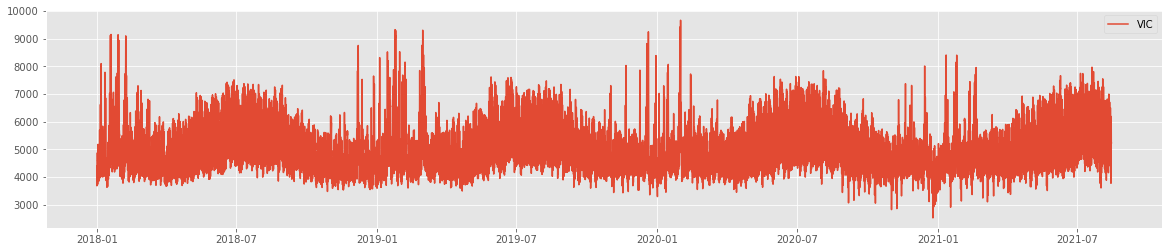

In [75]:
plt.figure(figsize=(20, 4))
# vic_sample = vic[(vic['Regions VIC Trading Price ($/MWh)']< 2000) & (vic['Regions T?AS Trading Price ($/MWh)']<2000 )]
# plt.plot(vic_sample.time, vic_sample['Regions NSW Trading Price ($/MWh)'], label='NSW')
# plt.plot(vic_sample.time, vic_sample['Regions SA Trading Price ($/MWh)'], label='SA')
# plt.plot(vic_sample.time, vic_sample['Regions TAS Trading Price ($/MWh)'], label='TAS')
# plt.plot(vic_sample.time, vic_sample['Regions VIC Trading Price ($/MWh)'], label='VIC')
plt.plot(vic.time, vic['Regions VIC Operational Demand (MW)']., label='VIC')

plt.legend()
plt.show()

vic vs nsw: +
vic vs sa: -

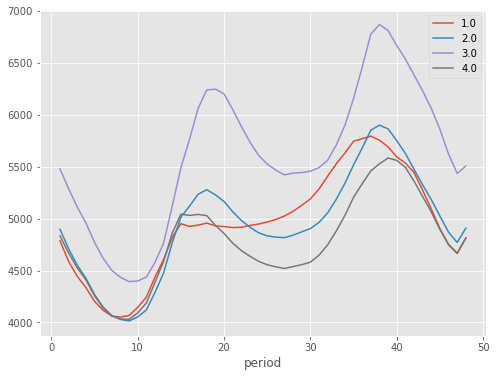

In [158]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in vic.groupby('season'):
    df.period = df.period.astype(int)
    df.groupby('period').mean()['Regions VIC Operational Demand (MW)'].plot(ax=ax, label=label)
plt.legend()

In [159]:
x_train = vic_train.loc[:, ['Regions NSW Trading Total Intermittent Generation (MW)',
                            'Regions SA Trading Total Intermittent Generation (MW)',
                            'Regions TAS Trading Total Intermittent Generation (MW)',
                            'Regions VIC Trading Total Intermittent Generation (MW)',
                            'month', 
                            'day', 
                            'weekday', 
                            'period', 
                            'season',
                            'solar_exposure']]
y_train = vic_train['Regions VIC Operational Demand (MW)']
x_train

,Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),month,day,weekday,period,season,solar_exposure
0,0.15,43.07,118.73,131.68,1,1,0,2,1.00,31.40
1,0.13,41.67,110.48,119.98,1,1,0,3,1.00,31.40
2,0.14,42.15,120.09,123.86,1,1,0,4,1.00,31.40
3,0.16,38.31,114.64,132.72,1,1,0,5,1.00,31.40
4,0.16,33.39,112.90,120.73,1,1,0,6,1.00,31.40
...,...,...,...,...,...,...,...,...,...,...
52602,63.11,224.26,52.25,295.14,12,31,3,44,1.00,7.30
52603,75.50,239.11,56.29,272.81,12,31,3,45,1.00,7.30
52604,69.25,244.31,62.26,221.45,12,31,3,46,1.00,7.30
52605,48.87,236.55,73.91,189.40,12,31,3,47,1.00,7.30


In [160]:
x_test = vic_test.loc[:, ['Regions NSW Trading Total Intermittent Generation (MW)',
                            'Regions SA Trading Total Intermittent Generation (MW)',
                            'Regions TAS Trading Total Intermittent Generation (MW)',
                            'Regions VIC Trading Total Intermittent Generation (MW)',
                            'month', 
                            'day', 
                            'weekday', 
                            'period', 
                            'season',
                            'solar_exposure']]
y_test = vic_test['Regions VIC Operational Demand (MW)']
x_test

,Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),month,day,weekday,period,season,solar_exposure
0,4.35,4.76,83.70,184.60,7,1,3,1,3.00,9.30
1,5.26,4.92,77.71,175.53,7,1,3,2,3.00,9.30
2,5.05,4.73,73.68,130.56,7,1,3,3,3.00,9.30
3,4.62,7.19,76.40,120.55,7,1,3,4,3.00,9.30
4,4.12,7.45,78.61,125.84,7,1,3,5,3.00,9.30
...,...,...,...,...,...,...,...,...,...,...
2011,154.26,245.42,165.37,304.83,8,11,2,44,3.00,8.00
2012,154.28,248.05,167.41,321.83,8,11,2,45,3.00,8.00
2013,156.25,240.22,166.32,330.72,8,11,2,46,3.00,8.00
2014,150.55,228.38,165.11,320.81,8,11,2,47,3.00,8.00


In [161]:
x_cv = vic_cv.loc[:, ['Regions NSW Trading Total Intermittent Generation (MW)',
                            'Regions SA Trading Total Intermittent Generation (MW)',
                            'Regions TAS Trading Total Intermittent Generation (MW)',
                            'Regions VIC Trading Total Intermittent Generation (MW)',
                            'month', 
                            'day', 
                            'weekday', 
                            'period', 
                            'season',
                            'solar_exposure']]
y_cv = vic_cv['Regions VIC Operational Demand (MW)']
x_cv

,Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),month,day,weekday,period,season,solar_exposure
0,34.43,249.30,105.96,207.49,1,1,4,1,1.00,27.30
1,46.81,237.61,118.83,208.82,1,1,4,2,1.00,27.30
2,47.24,223.38,121.41,192.02,1,1,4,3,1.00,27.30
3,68.91,214.05,105.22,172.57,1,1,4,4,1.00,27.30
4,57.78,202.90,100.05,167.15,1,1,4,5,1.00,27.30
...,...,...,...,...,...,...,...,...,...,...
8683,28.47,57.81,110.08,205.28,6,30,2,44,3.00,7.70
8684,29.46,31.90,109.11,216.45,6,30,2,45,3.00,7.70
8685,27.71,20.82,103.20,224.00,6,30,2,46,3.00,7.70
8686,12.08,11.21,79.69,211.81,6,30,2,47,3.00,7.70


## Random Forest Regressor

In [162]:
from sklearn.ensemble import RandomForestRegressor

rfr_clf = RandomForestRegressor(n_estimators=100, random_state=1)
rfr_clf.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [163]:
print("RandomForestRegressor accuracy: ")
rfr_result = rfr_clf.predict(x_test)
rfr_residuals = y_test - rfr_result
print('Mean Absolute Percent Error:', round(np.mean(abs(rfr_residuals/y_test)), 4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rfr_residuals**2)))

RandomForestRegressor accuracy: 
Mean Absolute Percent Error: 0.0466
Root Mean Squared Error: 343.7314141657336


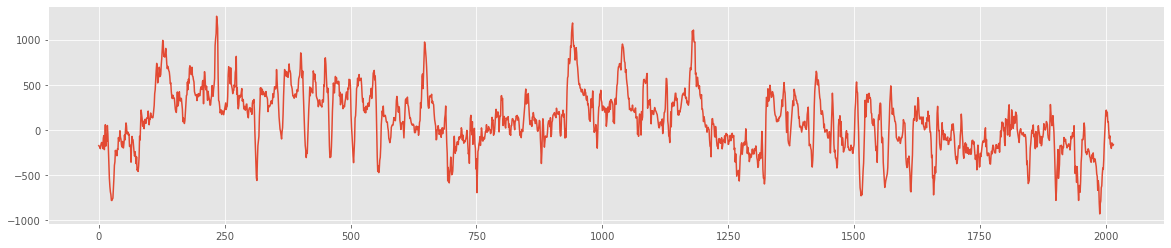

In [164]:
plt.figure(figsize=(20, 4))
plt.plot(rfr_residuals)

In [73]:
vic_train.head(48)

,time,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW),month,day,year,weekday,period,solar_exposure,season
0,2018-01-01 00:30:00,91.86,107.17,92.28,92.46,0.15,43.07,118.73,131.68,6974,1359,1082,4398,1,1,2018,0,2,31.40,1.00
1,2018-01-01 01:00:00,88.83,103.31,87.53,87.62,0.13,41.67,110.48,119.98,6790,1316,1071,4238,1,1,2018,0,3,31.40,1.00
2,2018-01-01 01:30:00,73.62,88.20,76.29,73.08,0.14,42.15,120.09,123.86,6536,1240,1067,4112,1,1,2018,0,4,31.40,1.00
3,2018-01-01 02:00:00,71.49,85.24,75.10,70.18,0.16,38.31,114.64,132.72,6339,1194,1061,3956,1,1,2018,0,5,31.40,1.00
4,2018-01-01 02:30:00,69.27,81.75,72.92,67.43,0.16,33.39,112.90,120.73,6195,1163,1060,3833,1,1,2018,0,6,31.40,1.00
5,2018-01-01 03:00:00,68.44,80.89,71.59,66.31,0.17,30.46,111.15,128.69,6067,1151,1058,3749,1,1,2018,0,7,31.40,1.00
6,2018-01-01 03:30:00,69.67,83.41,74.01,67.72,0.18,28.04,88.45,122.97,6029,1133,1044,3702,1,1,2018,0,8,31.40,1.00
7,2018-01-01 04:00:00,67.58,80.10,76.05,65.50,0.43,38.62,55.27,116.66,5985,1115,1037,3688,1,1,2018,0,9,31.40,1.00
8,2018-01-01 04:30:00,67.09,78.41,69.68,64.50,0.80,40.71,84.49,125.17,6005,1106,1042,3700,1,1,2018,0,10,31.40,1.00
9,2018-01-01 05:00:00,67.53,80.07,70.62,65.41,0.97,35.56,99.96,112.73,6012,1109,1058,3701,1,1,2018,0,11,31.40,1.00


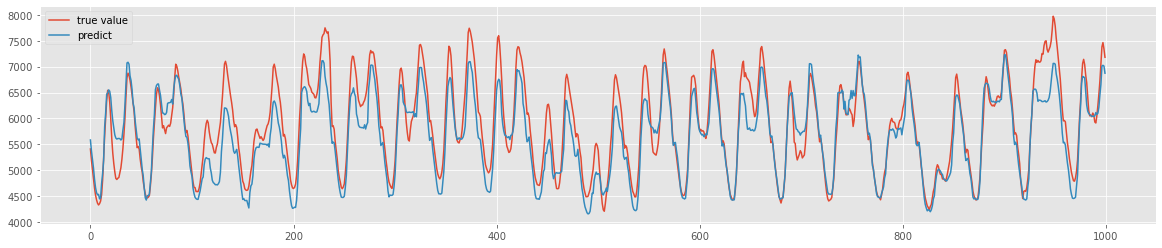

In [165]:
plt.figure(figsize=(20, 4))
plt.plot(y_test[:1000], label='true value')
plt.plot(rfr_result[:1000], label='predict')
plt.legend()
plt.show()

In [166]:
# Get numerical feature importances
importances = list(rfr_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: period               Importance: 0.4
Variable: solar_exposure       Importance: 0.14
Variable: weekday              Importance: 0.13
Variable: month                Importance: 0.1
Variable: day                  Importance: 0.07
Variable: season               Importance: 0.05
Variable: Regions NSW Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions SA Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions TAS Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions VIC Trading Total Intermittent Generation (MW) Importance: 0.03


[None, None, None, None, None, None, None, None, None, None]

### improve

In [167]:
vic = vic.join(pd.get_dummies(vic["weekday"], prefix="weekday_" ))
vic = vic.join(pd.get_dummies(vic["season"], prefix="season_" ))
vic = vic.drop("weekday", axis=1)
vic = vic.drop("season", axis=1)


In [168]:
vic = vic.drop(["Regions NSW Trading Price ($/MWh)",
                "Regions TAS Trading Price ($/MWh)",
                "Regions VIC Trading Price ($/MWh)",
                'Regions SA Trading Price ($/MWh)',
                'Regions NSW Operational Demand (MW)',
                'Regions TAS Operational Demand (MW)',
                'Regions SA Operational Demand (MW)'],
                axis=1)


vic_train = vic[vic["time"] <= "2020-12-31 23:30:00"]
vic_test = vic[(vic['time'] >= "2021-07-01 00:00:00") & (vic['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
vic_cv = vic[(vic['time'] >= "2021-01-01 00:00:00") & (vic['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)


In [169]:
#                 'Regions VIC Operational Demand (MW)',
x_train_2 = vic_train.drop(['Regions VIC Operational Demand (MW)','time'], axis =1)
y_train_2 = vic_train['Regions VIC Operational Demand (MW)']

x_test_2 = vic_test.drop(['Regions VIC Operational Demand (MW)','time'], axis =1)
y_test_2 = vic_test['Regions VIC Operational Demand (MW)']

x_cv_2 = vic_cv.drop(['Regions VIC Operational Demand (MW)','time'], axis =1)
y_cv_2 = vic_cv['Regions VIC Operational Demand (MW)']

In [170]:
rfr_clf_2 = RandomForestRegressor(n_estimators=100, random_state=1)
rfr_clf_2.fit(x_train_2, y_train_2)

RandomForestRegressor(random_state=1)

In [171]:
print("RandomForestRegressor accuracy: ")
rfr_result = rfr_clf_2.predict(x_test_2)
rfr_residuals = y_test_2 - rfr_result
print('Mean Absolute Percent Error:', round(np.mean(abs(rfr_residuals/y_test_2)), 4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rfr_residuals**2)))

RandomForestRegressor accuracy: 
Mean Absolute Percent Error: 0.0483
Root Mean Squared Error: 351.3947712847472


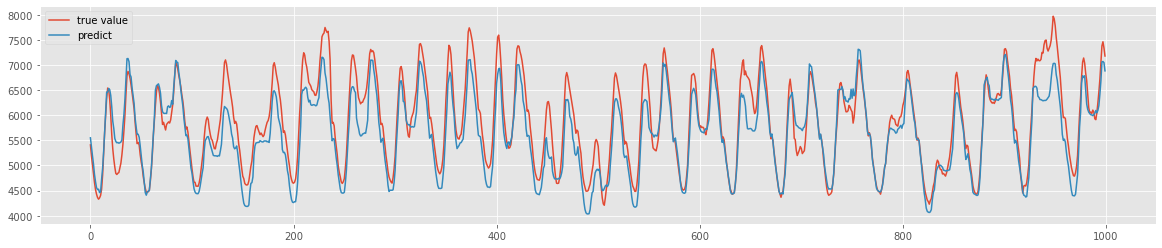

In [173]:
plt.figure(figsize=(20, 4))
plt.plot(y_test[:1000], label='true value')
plt.plot(rfr_result[:1000], label='predict')
plt.legend()
plt.show()

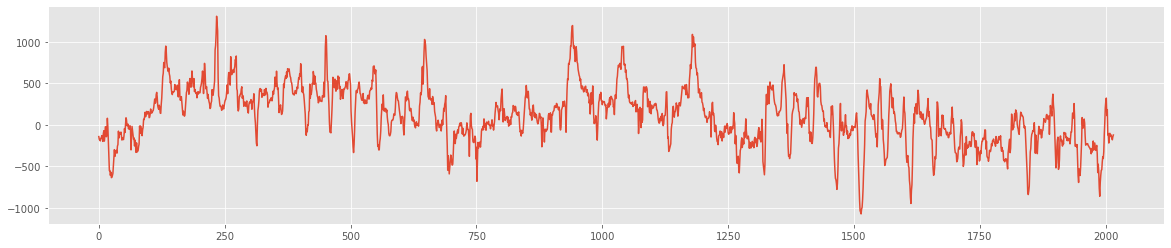

In [174]:
plt.figure(figsize=(20, 4))
plt.plot(rfr_residuals)

In [175]:
# Get numerical feature importances
importances = list(rfr_clf_2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: period               Importance: 0.4
Variable: season               Importance: 0.09
Variable: day                  Importance: 0.07
Variable: month                Importance: 0.05
Variable: Regions SA Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions TAS Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions VIC Trading Total Intermittent Generation (MW) Importance: 0.03
Variable: Regions NSW Trading Total Intermittent Generation (MW) Importance: 0.02
Variable: weekday              Importance: 0.02
Variable: solar_exposure       Importance: 0.0


[None, None, None, None, None, None, None, None, None, None]

## other model - Exponsional smoothing

In [11]:
vic_train = vic_train.rename(columns={"Regions VIC Trading Price ($/MWh)": "spot_price"})

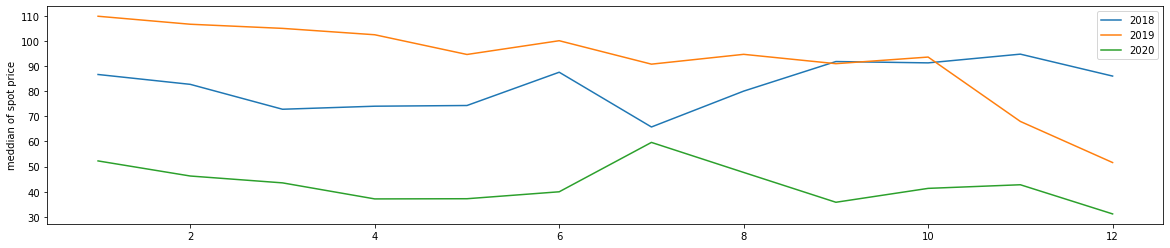

In [52]:
price_median = vic_train.groupby(['year', 'month']).median()
plt.figure(figsize=(20, 4))
plot_df = price_median.unstack('year').loc[:, 'spot_price']
plt.plot(plot_df)
plt.ylabel('meddian of spot price')
plt.legend(['2018', '2019', '2020'])
plt.show()

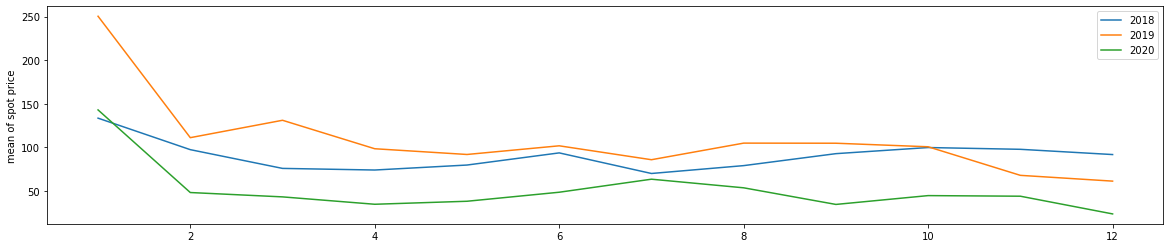

In [53]:
price_median = vic_train.groupby(['year', 'month']).mean()
plt.figure(figsize=(20, 4))
plot_df = price_median.unstack('year').loc[:, 'spot_price']
plt.plot(plot_df)
plt.ylabel('mean of spot price')
plt.legend(['2018', '2019', '2020'])
plt.show()

In [70]:
vic = pd.read_csv("../../data/vic_train.csv")
vic = vic.loc[1:].reset_index(drop=True)
vic['time'] = vic['time'].astype('datetime64[ns]')
# vic['month'] = vic.time.dt.month
vic['day'] = vic.time.dt.date
# vic['weekday'] = vic['time'].apply(lambda x: x.weekday())
# vic = vic.groupby(['day', 'time']).sum()
vic

,time,spot_price,inter_gen,demand,period,day
0,2018-01-01 00:30:00,92.46,131.68,4398,2,2018-01-01
1,2018-01-01 01:00:00,87.62,119.98,4238,3,2018-01-01
2,2018-01-01 01:30:00,73.08,123.86,4112,4,2018-01-01
3,2018-01-01 02:00:00,70.18,132.72,3956,5,2018-01-01
4,2018-01-01 02:30:00,67.43,120.73,3833,6,2018-01-01
...,...,...,...,...,...,...
52602,2020-12-31 21:30:00,35.05,295.14,4421,44,2020-12-31
52603,2020-12-31 22:00:00,35.49,272.81,4353,45,2020-12-31
52604,2020-12-31 22:30:00,48.25,221.45,4323,46,2020-12-31
52605,2020-12-31 23:00:00,38.66,189.40,4330,47,2020-12-31


In [71]:
vic.index = vic.day
vic = vic.spot_price

In [72]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

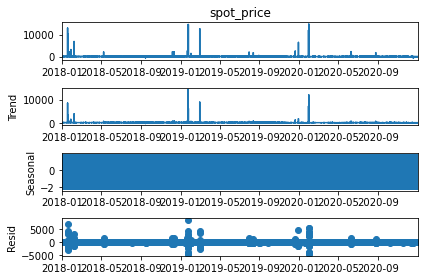

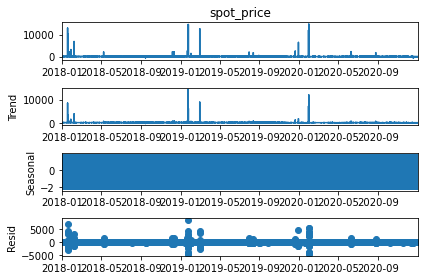

In [73]:
seasonal_decompose(vic,model='additive',freq=4).plot()